In [1]:
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [174]:
class Graph:    
    def __init__(self, adjlist, n) :
        self.adjlist = adjlist
        self.n = n
        
        g = nx.Graph()

        for u in self.adjlist:
            adj = self.adjlist[u]
            for v in adj:
                if (u,v) not in g.edges():
                    g.add_edge(u, v, weight=adj[v])
        
        self.g = g
    
    def visualize(self):            
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=500, alpha=0.8)
        edge_labels = nx.get_edge_attributes(self.g, "weight")
        nx.draw_networkx_edge_labels(self.g, pos, edge_labels=edge_labels)
        plt.show()
        
    def visualizepath(self, path):
        edges = []
        
        for i in range(len(path)-1):
            edges.append((path[i], path[i+1]))
        
        pos = nx.kamada_kawai_layout(self.g)
        nx.draw(self.g, pos=pos, with_labels=True, node_size=750, alpha=0.8)
        nx.draw_networkx_edges(self.g, pos, edgelist=edges, width=3, edge_color='g', alpha=1)
        plt.show()

In [175]:
def tps(graph):
    paths = getpaths(graph)
    
    mincost = None
    minpath = None
    
    for path, cost in paths:
        if mincost == None or mincost > cost:
            mincost = cost
            minpath = path
    
    return mincost, minpath


def getpaths(graph):
    q = deque()
    paths = []
    
    for node in graph.adjlist:
        q.append(([node], 0))
    
    while q:
        path, cost = q.popleft()
        
        lastnode = path[-1]
        
        if len(path) == graph.n:
            new_path = path[:]
            new_path.append(path[0])
            new_cost = cost + graph.adjlist[lastnode][path[0]]
            paths.append((new_path, new_cost))
        else:
            for node in graph.adjlist[lastnode]:
                if node not in path:
                    new_path = path[:]
                    new_path.append(node)
                    new_cost = cost + graph.adjlist[lastnode][node]
                    q.append((new_path, new_cost))
    
    return paths

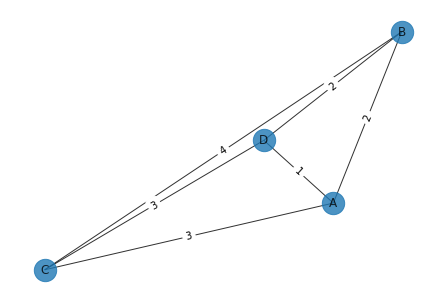

In [176]:
adjlist = {
        'A': {'B': 2, 'C': 3, 'D': 1},
        'B': {'A': 2, 'C': 4, 'D': 2},
        'C': {'A': 3, 'B': 4, 'D': 3},
        'D': {'A': 1, 'B': 2, 'C': 3}
          }

g = Graph(adjlist, 4)

g.visualize()

In [177]:
mincost, minpath = tps(g)

print(f"Minimum Cost: {mincost}")
print(f"Path: {minpath}")

Minimum Cost: 10
Path: ['A', 'B', 'C', 'D', 'A']


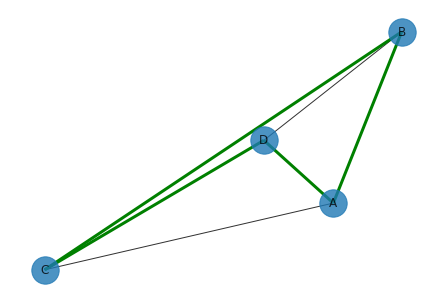

In [178]:
g.visualizepath(minpath)

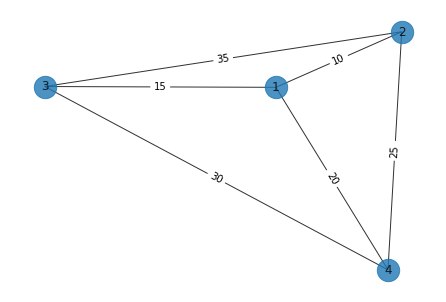

In [179]:
adjlist = {
    '1': {'2':10, '3':15, '4':20},
    '2': {'1':10, '3':35, '4':25},
    '3': {'1':15, '2':35, '4':30},
    '4': {'1':20, '2':25, '3':30}
}

g = Graph(adjlist, 4)

g.visualize()

In [180]:
mincost, minpath = tps(g)

print(f"Minimum Cost: {mincost}")
print(f"Path: {minpath}")

Minimum Cost: 80
Path: ['1', '2', '4', '3', '1']


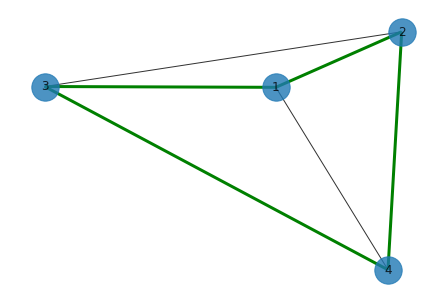

In [181]:
g.visualizepath(minpath)